---
title: Nonlinear Regression
---

In the last lecture, we started discussing nonlinear regression models. As a motivating example, we considered the following dataset (from FRED) on Annual Estimates of the Resident Population of California (units are thousands of persons) from 1900 to 2024. 

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

  observation_date   CAPOP
0       1900-01-01  1490.0
1       1901-01-01  1550.0
2       1902-01-01  1623.0
3       1903-01-01  1702.0
4       1904-01-01  1792.0
5       1905-01-01  1893.0
6       1906-01-01  1976.0
7       1907-01-01  2054.0
8       1908-01-01  2161.0
9       1909-01-01  2282.0
    observation_date      CAPOP
115       2015-01-01  38904.296
116       2016-01-01  39149.186
117       2017-01-01  39337.785
118       2018-01-01  39437.463
119       2019-01-01  39437.610
120       2020-01-01  39521.958
121       2021-01-01  39142.565
122       2022-01-01  39142.414
123       2023-01-01  39198.693
124       2024-01-01  39431.263


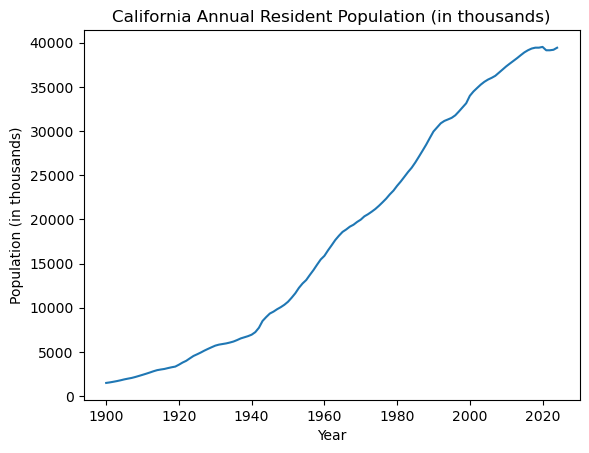

In [194]:
capop = pd.read_csv('CAPOP_11Sept2025.csv')
print(capop.head(10))
print(capop.tail(10))
tme = np.arange(1900, 2025)
plt.plot(tme, capop['CAPOP'], label='California Population')
plt.xlabel('Year')
plt.ylabel('Population (in thousands)')
plt.title('California Annual Resident Population (in thousands)')
plt.show()

We work with the logarithms of the population data as this will lead to models with better interpretability. 

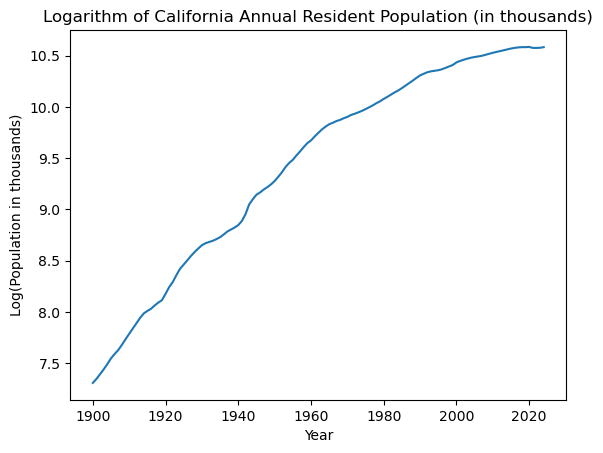

In [195]:
y = np.log(capop['CAPOP'])
n = len(y)
plt.plot(tme, y)
plt.xlabel('Year')
plt.ylabel('Log(Population in thousands)')
plt.title('Logarithm of California Annual Resident Population (in thousands)')
plt.show()

If we fit a linear regression model to this data, we will get an estimate of the overall growth rate. 

                            OLS Regression Results                            
Dep. Variable:                  CAPOP   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2343.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           6.13e-82
Time:                        23:37:20   Log-Likelihood:                 10.482
No. Observations:                 125   AIC:                            -16.96
Df Residuals:                     123   BIC:                            -11.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7301      0.040    191.493      0.0

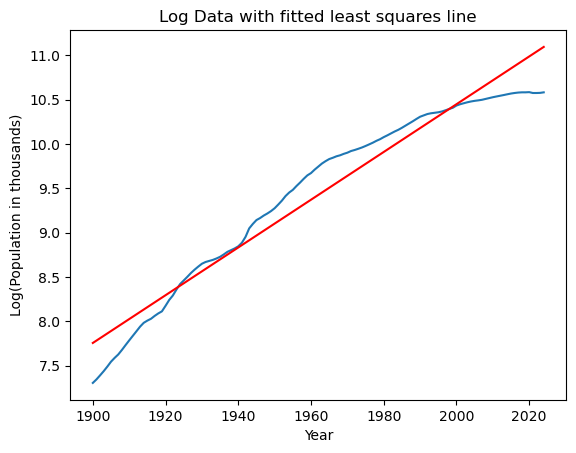

In [196]:
x = np.arange(1, n+1)
X = np.column_stack((np.ones(n), x))
linreg = sm.OLS(y, X).fit()
print(linreg.summary())
plt.plot(tme, y, label='Log(Population in thousands)')
plt.plot(tme, linreg.fittedvalues, color='red', label='Fitted least squares line')
plt.xlabel('Year')
plt.ylabel('Log(Population in thousands)')
plt.title('Log Data with fitted least squares line')
plt.show()

The fitted slope coefficient here is 0.0269. The interpretation is that the population increases by 2.69\% each year. 

The simple linear regression model does not provide a good fit to the data. The quality of the fit can be assessed using the Residual Sum of Squares (RSS). 

In [197]:
rss_lm = np.sum(linreg.resid ** 2)
print(rss_lm)

6.188666219005153



The simple linear regression model is not a good fit to the data. It is clear that the population growth rate is not 2.69\% uniformly. In the initial years, the growth rate seems to higher than 2.69\%, and in recent years, it seems to be lower. The simple linear regression model cannot pick up these variable growth rates. We can instead consider the following model: 
\begin{equation*}
  y_t = \beta_0 + \beta_1 t + \beta_2 (t - c)_+ + \epsilon_t
\end{equation*}
This model uses $\beta_1$ for the slope before $c$, and $\beta_1 + \beta_2$ for the slope after $c$. 

If $c$ is known, then this is again linear regression (but now it is multiple linear regression as opposed to simple linear regression), and we can fit this model as follows. 

                            OLS Regression Results                            
Dep. Variable:                  CAPOP   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2487.
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.33e-99
Time:                        23:37:21   Log-Likelihood:                 56.364
No. Observations:                 125   AIC:                            -106.7
Df Residuals:                     122   BIC:                            -98.24
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1511      0.058    124.023      0.0

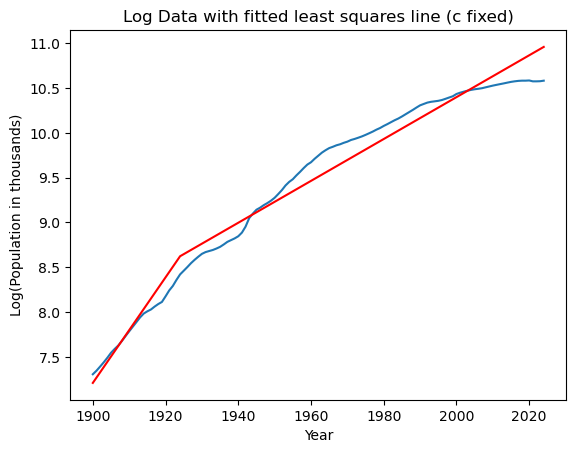

In [198]:
c = 25 #some arbitrary value
x = np.arange(1, n+1)
x_c = np.maximum(0, x - c)
X = np.column_stack((np.ones(n), x, x_c))
linreg_c_fixed = sm.OLS(y, X).fit()
print(linreg_c_fixed.summary())
plt.plot(tme, y, label='Log(Population in thousands)')
plt.plot(tme, linreg_c_fixed.fittedvalues, color='red', label='Fitted least squares line')
plt.xlabel('Year')
plt.ylabel('Log(Population in thousands)')
plt.title('Log Data with fitted least squares line (c fixed)')
plt.show()

To assess the quality of fit of this model, we again look at the residual sum of squares. 

In [199]:
rss_lm_c_fixed = np.sum(linreg_c_fixed.resid ** 2)
print(rss_lm_c_fixed, rss_lm)

2.9701688105057675 6.188666219005153


The RSS now is much smaller than the RSS for the simple linear regression model. If we change the value of $c$, there is the possibility of getting smaller RSS. 

In [200]:
c = 75 #some arbitrary value
x = np.arange(1, n+1)
x_c = np.maximum(0, x - c)
X = np.column_stack((np.ones(n), x, x_c))
linreg_c_fixed = sm.OLS(y, X).fit()
rss_lm_c_fixed = np.sum(linreg_c_fixed.resid ** 2)
print(rss_lm_c_fixed)

0.5429018431026456


A natural way of estimating $c$ is the following: 

1. For each fixed value of $c$, calculate RSS
2. Use the value of $c$ with the smallest RSS as the estimate

The following function calculates the value of RSS for each fixed value of $c$. 

In [201]:
def rss(c):
    x = np.arange(1, n+1)
    x_c = np.maximum(0, x - c)
    X = np.column_stack((np.ones(n), x, x_c))
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    return rss

We compute $RSS(c)$ for each $c \in \{1, \dots, n\}$ as follows.

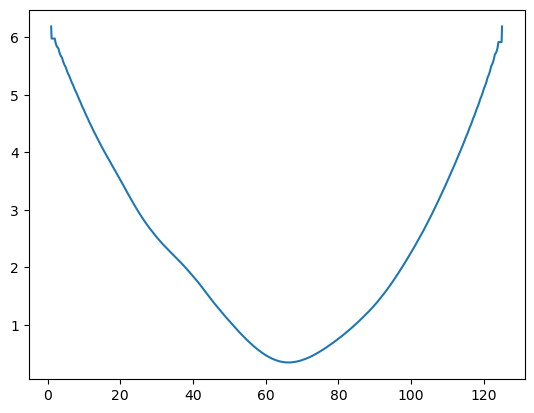

In [202]:
num_c_vals = 1000 #this is the number of different values of c we will try
allcvals = np.linspace(1, n, num_c_vals)
rssvals = np.array([rss(c) for c in allcvals])
plt.plot(allcvals, rssvals)
plt.show()

The estimate $\hat{c}$ is obtained by minimizing $RSS(c)$ as follows. 

In [203]:
c_hat = allcvals[np.argmin(rssvals)]
print(c_hat)
print(c_hat - 1 + tme[0]) #this is the estimated year when the slope changes
rss_smallest = np.min(rssvals)
print(rss_smallest, rss_lm, rss_lm_c_fixed)


66.28928928928929
1965.2892892892892
0.3490460776066182 6.188666219005153 0.5429018431026456


The fitted values will now look much better than before. 

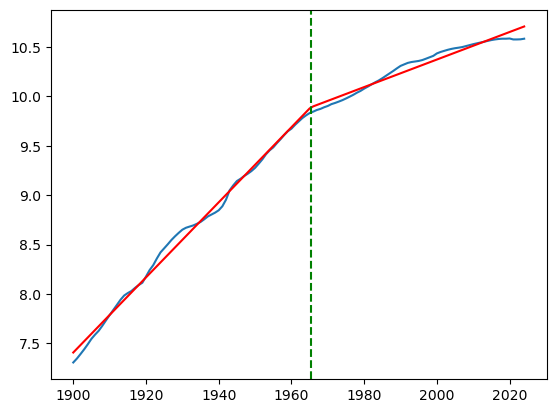

In [204]:
c = c_hat
x = np.arange(1, n+1)
x_c = np.maximum(0, x - c)
X = np.column_stack((np.ones(n), x, x_c))
md = sm.OLS(y, X).fit()
plt.plot(tme, y)
plt.plot(tme, md.fittedvalues, color = 'red')
plt.axvline(c_hat - 1 + tme[0], color='green', linestyle='--')
plt.show()

Point estimates of the other parameters are obtained as follows. 

In [205]:
#Estimates of other parameters: 
c = c_hat
x = np.arange(1, n+1)
x_c = np.maximum(0, x - c)
X = np.column_stack((np.ones(n), x, x_c))
md = sm.OLS(y, X).fit()
print(md.params) #this gives estimates of beta_0, beta_1, beta_2 

const    7.369373
x1       0.037996
x2      -0.024062
dtype: float64


The estimate of $\hat{\beta}_1$ is 0.038 and the estimate of $\hat{\beta}_2$ is $-0.024$. This means that the growth rate before 1965 was 3.8\% while the growth rate after 1965 is $3.8 - 2.4 = 1.4$\%. 

Next step is uncertainty quantification. For uncertainty quantification, we do Bayesian analysis. The posterior density for $c$ is given by: 
\begin{align*}
   \text{posterior}(c) \propto I\{1 < c < n\} |X_c^T X_c|^{-1/2} \left(\frac{1}{RSS(c)} \right)^{(n-p)/2}
\end{align*}
Note that the formula on the right hand side gives the unnormalized posterior (because the proportionality sign hides the normalizing constant). The function below computes this posterior on the log-scale for fixed $c$. Computing the logarithm is numerically much more stable. 

In [206]:
#Bayesian log posterior
def logpost(c):
    x = np.arange(1, n+1)
    x_c = np.maximum(0, x - c)
    X = np.column_stack([np.ones(n), x, x_c])
    p = X.shape[1]
    md = sm.OLS(y, X).fit()
    rss = np.sum(md.resid ** 2)
    sgn, log_det = np.linalg.slogdet(np.dot(X.T, X)) #sgn gives the sign of the determinant (in our case, this should 1)
    #log_det gives the logarithm of the absolute value of the determinant
    logval = ((p-n)/2) * np.log(rss) - (0.5)*log_det
    return logval

We now evaluate the log posterior on a grid of values of $c$. We will not consider values of $c$ that are too close to 1 or $n$ to avoid numerical issues arising from near singularity of the determinant term. 

[  1.62062062   1.74474474   1.86886887   1.99299299   2.11711712
   2.24124124   2.36536537   2.48948949   2.61361361   2.73773774
   2.86186186   2.98598599   3.11011011   3.23423423   3.35835836
   3.48248248   3.60660661   3.73073073   3.85485485   3.97897898
   4.1031031    4.22722723   4.35135135   4.47547548   4.5995996
   4.72372372   4.84784785   4.97197197   5.0960961    5.22022022
   5.34434434   5.46846847   5.59259259   5.71671672   5.84084084
   5.96496496   6.08908909   6.21321321   6.33733734   6.46146146
   6.58558559   6.70970971   6.83383383   6.95795796   7.08208208
   7.20620621   7.33033033   7.45445445   7.57857858   7.7027027
   7.82682683   7.95095095   8.07507508   8.1991992    8.32332332
   8.44744745   8.57157157   8.6956957    8.81981982   8.94394394
   9.06806807   9.19219219   9.31631632   9.44044044   9.56456456
   9.68868869   9.81281281   9.93693694  10.06106106  10.18518519
  10.30930931  10.43343343  10.55755756  10.68168168  10.80580581
  10.9299299

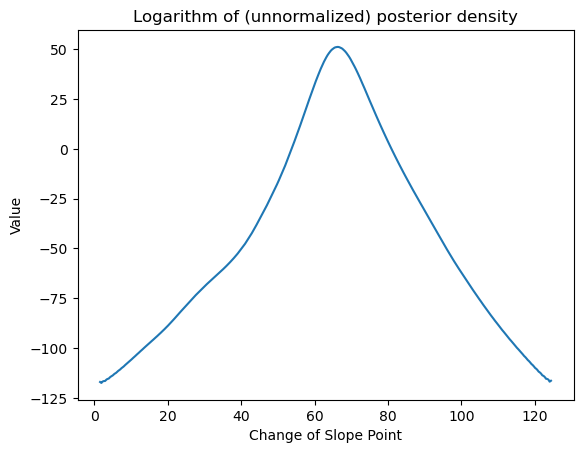

In [215]:
allcvals_modified = allcvals[5:-5] #we are dropping candidate c values that are very near the edges
print(allcvals_modified)
logpostvals = np.array([logpost(c) for c in allcvals_modified])
print(logpostvals)
plt.plot(allcvals_modified, logpostvals)
plt.xlabel('Change of Slope Point')
plt.ylabel('Value')
plt.title('Logarithm of (unnormalized) posterior density')
plt.show() 

Next we normalize the posterior density. 

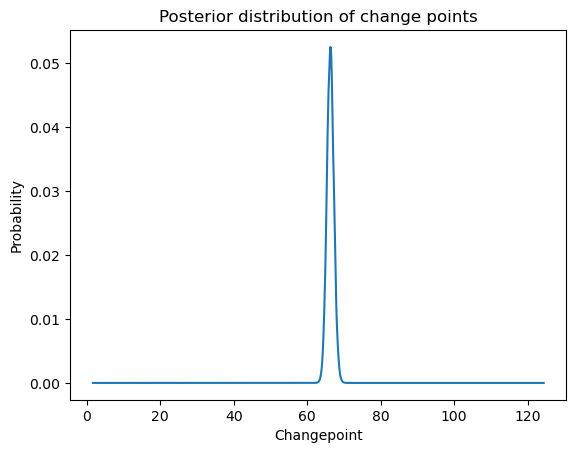

In [216]:
postvals_unnormalized = np.exp(logpostvals - np.max(logpostvals))
postvals = postvals_unnormalized/(np.sum(postvals_unnormalized))
plt.plot(allcvals_modified, postvals)
plt.xlabel('Changepoint')
plt.ylabel('Probability')
plt.title('Posterior distribution of change points')
plt.show()

Because of the presence of the term $|X_c^T X_c|^{-1/2}$, the maximizer of the posterior might be different from the least squares estimator (which minimizes RSS). However the two estimators will be close to each other:

In [217]:
print(allcvals_modified[np.argmax(postvals)]) #this is the posterior mode or maximizer
print(c_hat) #this is the least squares estimator

66.28928928928929
66.28928928928929


Using this posterior distribution, we can compute a 95\% uncertainty interval for $c$ in the following way. We calculate the probability of regions around the posterior maximizer, and find the region with probability at least 0.95. The code for this is given below. 

In [218]:
#95% credible interval for c:
def PostProbAroundMax(m):
    est_ind = np.argmax(postvals)
    ans = np.sum(postvals[(est_ind-m):(est_ind+m)])
    return(ans)
m = 0
while PostProbAroundMax(m) <= 0.95:
    m = m+1
est_ind = np.argmax(postvals)
c_est = allcvals_modified[est_ind]
#95% credible interval for f:
ci_c_low = allcvals_modified[est_ind - m]
ci_c_high = allcvals_modified[est_ind + m]
print(np.array([c_est, ci_c_low, ci_c_high]))
print(np.array([c_est - 1+ tme[0], ci_c_low - 1 + tme[0], ci_c_high - 1 + tme[0] ]))

[66.28928929 64.3033033  68.27527528]
[1965.28928929 1963.3033033  1967.27527528]


Below we draw posterior samples for $c$, and plot the posterior samples along with the data. 

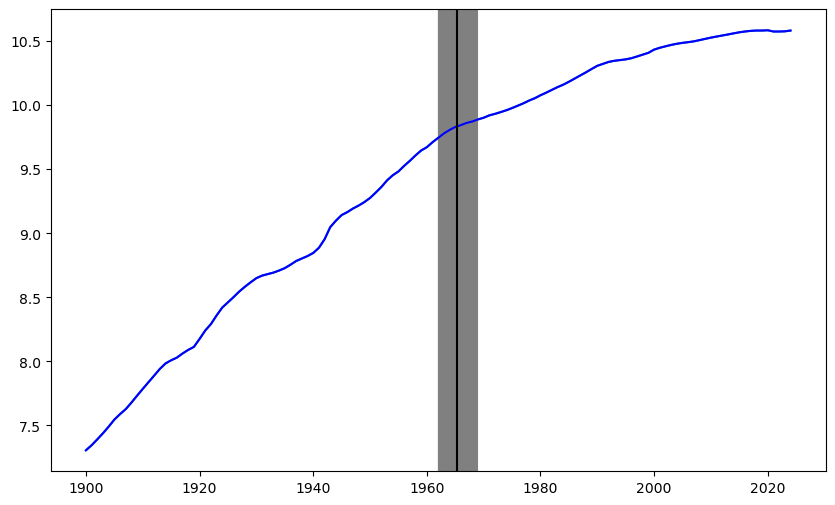

In [219]:
#Drawing posterior samples for c: 
N = 4000
rng = np.random.default_rng(seed = 42)
cpostsamples = rng.choice(allcvals_modified, N, replace = True, p = postvals)

#Let us plot the posterior samples for c on the original data:
plt.figure(figsize = (10, 6))
plt.plot(tme, y)
for i in range(N):
    plt.axvline(x = cpostsamples[i] - 1 + tme[0], color = 'gray')
plt.plot(tme, y, color = 'blue')
plt.axvline(x = c_hat - 1 + tme[0], color = 'black')
plt.show()

## Sunspots Data: Fitting Sinusoids

We now look at another example for nonlinear regression. The following dataset is downloaded from https://www.sidc.be/SILSO/datafiles (silso stands for sunspot index and long term solar observations). Data description can be found here: https://www.sidc.be/SILSO/infosnytot. There are five columns:

1. Column 1 is the year (2020.5 refers to the year 2020 for example)
2. Column 2 is the yearly mean total sunspot number (this is obtained by taking a simple arithmetic mean of the daily sunspot number over all the days for that year)
3. Column 3 is the yearly mean standard deviation of the input sunspot numbers from individual stations (-1 indicates missing value)
4. Column 4 is the number of observations used to compute the yearly mean sunspot number (-1 indicates a missing value)
5. Column 5 is a definitive/provisional marker (1 indicates that the data point is definitive, and 0 indicates that it is still provisional)

We shall work with the data in column 2 (yearly mean total sunspot number). 

In [191]:
#annual sunspots dataset:
sunspots = pd.read_csv('SN_y_tot_V2.0.csv', header = None, sep = ';')
print(sunspots.head())
sunspots.columns = ['year', 'sunspotsmean', 'sunspotssd', 'sunspotsnobs', 'isdefinitive']
print(sunspots.head(10))

        0     1    2  3  4
0  1700.5   8.3 -1.0 -1  1
1  1701.5  18.3 -1.0 -1  1
2  1702.5  26.7 -1.0 -1  1
3  1703.5  38.3 -1.0 -1  1
4  1704.5  60.0 -1.0 -1  1
     year  sunspotsmean  sunspotssd  sunspotsnobs  isdefinitive
0  1700.5           8.3        -1.0            -1             1
1  1701.5          18.3        -1.0            -1             1
2  1702.5          26.7        -1.0            -1             1
3  1703.5          38.3        -1.0            -1             1
4  1704.5          60.0        -1.0            -1             1
5  1705.5          96.7        -1.0            -1             1
6  1706.5          48.3        -1.0            -1             1
7  1707.5          33.3        -1.0            -1             1
8  1708.5          16.7        -1.0            -1             1
9  1709.5          13.3        -1.0            -1             1


0     8.3
1    18.3
2    26.7
3    38.3
4    60.0
Name: sunspotsmean, dtype: float64


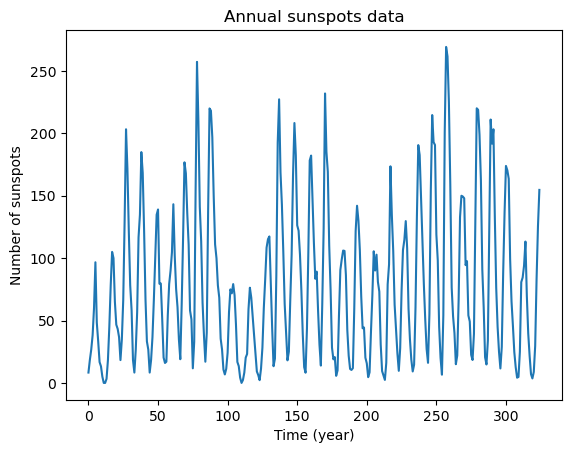

In [192]:
y = sunspots['sunspotsmean']
print(y.head())
plt.plot(y)
plt.xlabel('Time (year)')
plt.ylabel('Number of sunspots')
plt.title('Annual sunspots data')
plt.show()

We will fit the sinusoidal model: 
\begin{equation*}
  y_t = \beta_0 + \beta_1 \cos(2 \pi f t) + \beta_2 \sin(2 \pi f t) + \epsilon_t
\end{equation*}
with $\epsilon_t$ being i.i.d $N(0, \sigma^2)$. When $f$ is known, this is a linear regression model. When $f$ is unknown, this is a nonlinear regression model. This is very similar to the change of slope regression model, and those calculations can be used for inference in this model as well. We shall do this in the next lecture. 